**Import Necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)
pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

**Read the dataframe**

In [2]:
df = pd.read_csv("survey_results.csv")
df.shape

(30010, 17)

In [3]:
df.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250


### Data Cleaning

**1. Remove duplicates**

In [4]:


# View all duplicate rows
duplicates = df[df.duplicated()]
print("Number of Duplicate Rows:", len(duplicates))
duplicates

Number of Duplicate Rows: 10


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [5]:
#Removing the duplicates

df = df.drop_duplicates()

print("Number of rows after removing duplicates: ", df.shape)

Number of rows after removing duplicates:  (30000, 17)


**2: Outliers Removal**

- Abnormal values in age

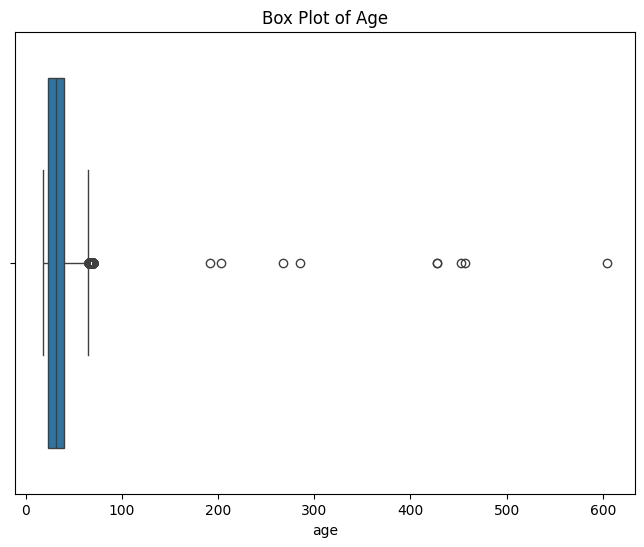

In [6]:
# Assuming df is your DataFrame and 'Age' is the column of interest
plt.figure(figsize=(8, 6))

# Plotting the box plot using seaborn
sns.boxplot(x=df['age'])

# Adding a title
plt.title('Box Plot of Age')

# Show the plot
plt.show()

- From the above, we can sense, there are many outliers in the above data.

In [7]:
df[df['age'] <= 70].shape

(29991, 17)

In [8]:
df[df['age'] > 70].shape

(9, 17)

In [9]:
df[df['age'] > 70]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


- It seems like respondents have made mistake during entering of age. We have 2 choice, whether to remove the data or assuming the last entered number is by mistake, we can just remove it and take rest of the age.
- As the number of mis-macth rows are less, we can remove / ignore them.  

In [10]:
df = df[df['age'] <= 70]
print("Number of rows after removing outlier ages: ", df.shape)

Number of rows after removing outlier ages:  (29991, 17)


- Logical error in occupation (Student category acorss all age groups)

**3: Handling Null data**

In [11]:
df.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

Seems like there are null values in `income_levels`, `consume_frequency(weekly)` and `purchase_channel`. Let's study one by one

- **1: income_levels**  (In which occupations, we have more nulls)

In [12]:
df['income_levels'].unique()

array(['<10L', '> 35L', '16L - 25L', nan, '10L - 15L', '26L - 35L'],
      dtype=object)

In [13]:
df[['occupation', 'income_levels']]

,occupation,income_levels
0,Working Professional,<10L
1,Working Professional,> 35L
2,Working Professional,> 35L
3,Working Professional,16L - 25L
4,Student,NaN
...,...,...
30005,Working Professional,16L - 25L
30006,Working Professional,> 35L
30007,Retired,<10L
30008,Working Professional,16L - 25L


In [14]:
null_counts = df.groupby('occupation')['income_levels'].apply(lambda x: x.isnull().sum())
null_counts

occupation
Entrepreneur               0
Retired                    0
Student                 8060
Working Professional       0
Name: income_levels, dtype: int64

- Seems that the null values are present only in `Student` category. This make sense that generally student do not earn and resulting in not mentioning the income levels. Let's fill this category as `Not Reported`.

In [15]:
df['income_levels'] = df['income_levels'].fillna('Not Reported')
df.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          8
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

- **2: consume_frequency(weekly)**

In [16]:
# let's check all rows which contain null values

null_rows = df[df['consume_frequency(weekly)'].isnull()]
null_rows

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
879,R00880,48,F,Urban,Entrepreneur,26L - 35L,NaN,Newcomer,Medium (500 ml),above 4,Quality,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Casual (eg. At home),200-250
4174,R04173,23,M,Urban,Student,Not Reported,NaN,Newcomer,Medium (500 ml),above 4,Price,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
9550,R09546,19,M,Urban,Student,Not Reported,NaN,Established,Medium (500 ml),0 to 1,Price,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),50-100
15352,R15347,25,M,Metro,Student,Not Reported,NaN,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),100-150
19719,R19713,27,M,Urban,Working Professional,16L - 25L,NaN,Newcomer,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
26143,R26134,19,M,Metro,Student,Not Reported,NaN,Newcomer,Medium (500 ml),2 to 4,Price,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
26859,R26850,25,M,Metro,Working Professional,16L - 25L,NaN,Established,Medium (500 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),200-250
27163,R27154,21,M,Metro,Student,Not Reported,NaN,Established,Small (250 ml),2 to 4,Price,Traditional,Retail Store,Simple,Low (Not very concerned),Casual (eg. At home),50-100


In [17]:
### Let's fill null values with `mode`

# Calculate the mode of the 'consume_frequency(weekly)' column
mode_value = df['consume_frequency(weekly)'].mode().iloc[0]

# Fill the null values with the mode
df['consume_frequency(weekly)'].fillna(mode_value, inplace=True)

- **3: purchase_channel**

In [18]:
null_rows = df[df['purchase_channel'].isnull()]
null_rows

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
653,R00654,35,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,NaN,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
1865,R01866,21,M,Urban,Student,Not Reported,0-2 times,Newcomer,Medium (500 ml),0 to 1,Availability,Traditional,NaN,Simple,Low (Not very concerned),Social (eg. Parties),50-100
4280,R04279,39,M,Metro,Entrepreneur,26L - 35L,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,NaN,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),200-250
14657,R14652,30,F,Urban,Working Professional,<10L,0-2 times,Newcomer,Medium (500 ml),2 to 4,Price,Exotic,NaN,Premium,High (Very health-conscious),Casual (eg. At home),150-200
15423,R15418,39,M,Rural,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,NaN,Premium,Medium (Moderately health-conscious),Casual (eg. At home),150-200
17207,R17202,41,M,Urban,Entrepreneur,16L - 25L,5-7 times,Newcomer,Large (1 L),2 to 4,Brand Reputation,Traditional,NaN,Eco-Friendly,High (Very health-conscious),Social (eg. Parties),200-250
20527,R20521,22,F,Metro,Student,Not Reported,3-4 times,Newcomer,Large (1 L),0 to 1,Price,Exotic,NaN,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
23741,R23733,26,M,Urban,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Quality,Traditional,NaN,Eco-Friendly,High (Very health-conscious),Social (eg. Parties),200-250
24551,R24543,48,F,Metro,Entrepreneur,> 35L,3-4 times,Newcomer,Large (1 L),0 to 1,Brand Reputation,Exotic,NaN,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),200-250
28559,R28550,35,M,Urban,Student,Not Reported,0-2 times,Newcomer,Medium (500 ml),0 to 1,Price,Exotic,NaN,Simple,Low (Not very concerned),Casual (eg. At home),50-100


In [19]:
### Let's fill null values with `mode`

# Calculate the mode of the 'purchase_channel' column
mode_value = df['purchase_channel'].mode().iloc[0]
print(mode_value)

# Fill the null values with the mode
df['purchase_channel'].fillna(mode_value, inplace=True)

Online


Finally check any nulls values till

In [20]:
df.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

**4: Handling Spelling mistakes**

In [21]:
df['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [22]:
df['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

- Seems some of the category are mistakenly spelled wrong. We need to replace them

In [23]:
# replace in zone

# Define the replacements in a dictionary
replacements = {
    'urbna': 'Urban',
    'Metor': 'Metro'
}

# Replace the specified categories
df['zone'] = df['zone'].replace(replacements)

In [24]:
# replace in current_brand

# Define the replacements in a dictionary
replacements = {
    'Establishd': 'Established',
    'newcomer': 'Newcomer'
}

# Replace the specified categories
df['current_brand'] = df['current_brand'].replace(replacements)

### Feature Engineering

1. Adding `age_group` instead of just age. This will help for model performance

In [25]:
df.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250


In [26]:
df.shape

(29991, 17)

In [27]:
# Define the function to categorize age into age groups
def categorize_age(age):
    if 18 <= age <= 25:
        return "18-25"
    elif 26 <= age <= 35:
        return "26-35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    elif 56 <= age <= 70:
        return "56-70"
    else:
        return "70+"

# Apply the function to the 'age' column to create the 'age_group' column
df['age_group'] = df['age'].apply(categorize_age)

#remove age category
df.drop('age', axis = 1, inplace = True)

### Add Derived Columns

In [28]:

# i) cf_ab_score (consume_frequency and awareness_of_other_brands score)
def calcuate_cf_ab_score(row):
    comsume_frequency_map = {'0-2 times': 1, '3-4 times': 2, '5-7 times': 3}
    awareness_brands_map = {'0 to 1': 1, '2 to 4': 2, 'above 4': 3}

    #get the required col
    freq = row['consume_frequency(weekly)']
    awareness = row['awareness_of_other_brands']

    #maping
    freq_num = comsume_frequency_map[freq]
    awareness_num = awareness_brands_map[awareness]

    cf_ab_score = freq_num / (awareness_num + freq_num)

    return round(cf_ab_score, 2)

df['cf_ab_score'] = df.apply(lambda row: calcuate_cf_ab_score(row), axis = 1)



# ii) Zone Affluence Score (ZAS):
def calculate_zas(row):
    # Sample mapping for zone and income levels
    zone_map = {'Urban': 3, 'Metro': 4, 'Rural': 1, 'Semi-Urban': 2}
    income_map = {'<10L': 1, '10L - 15L': 2, '16L - 25L': 3, '26L - 35L': 4, '> 35L': 5, 'Not Reported': 0 }
    
    # Get the values for zone and income
    zone = row['zone']
    income = row['income_levels']

    # Map the zone and income to respective scores
    zone_score = zone_map.get(zone, 0)  # Default to 0 if not found
    income_score = income_map.get(income, 0)  # Default to 0 if not found

    # Calculate the Zone Affluence Score
    zas = zone_score * income_score

    return zas
# Apply the function to calculate ZAS for each row
df['zas_score'] = df.apply(calculate_zas, axis=1)


# bsi (Brand switch indicator)
df['bsi'] = df.apply(lambda row: 1 if row['current_brand'] != 'Established' and row['reasons_for_choosing_brands'] in ['Price', 'Quality'] else 0, axis=1)

**Removing Logical Outliers**

In [29]:
# Cross-tabulation of age_group and occupation
crosstab = pd.crosstab(df['age_group'], df['occupation'])
crosstab

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106


- If you observe carefully, from the above data, We have students in the age group of `56-70` which is not possible. This happen due to wrong entry. We need to remove them

In [30]:
print("Number of rows before removing students category in age group 56-70: ", df.shape)

Number of rows before removing students category in age group 56-70:  (29991, 20)


In [31]:
df = df[~((df['age_group'] == '56-70') & (df['occupation'] == 'Student'))]

print("Number of rows after removing students category in age group 56-70: ", df.shape)

Number of rows after removing students category in age group 56-70:  (29956, 20)


#### Final dataframe

In [32]:
df.head(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0


### Modelling

In [33]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [34]:
# Define features and target variable
X = df.drop(["respondent_id", "price_range"], axis="columns")
y = df['price_range']

**Train and Test split**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [36]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (22467, 18)
X_test:  (7489, 18)


### Encoding the data

- one hot encoding

In [37]:
# get the col names
one_hot_columns = [
    'gender', 'zone', 'occupation', 'current_brand', 'awareness_of_other_brands',
    'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
    'packaging_preference', 'typical_consumption_situations'
]

# Apply OHE to training data
X_train_processed = pd.get_dummies(X_train, columns=one_hot_columns, drop_first=True)

# Apply OHE to test data
X_test_processed = pd.get_dummies(X_test, columns=one_hot_columns, drop_first=True)

# Align columns in the test DataFrame to match the training DataFrame: Sanity Check
missing_cols = set(X_train_processed.columns) - set(X_test_processed.columns)
for col in missing_cols:
    X_test_processed[col] = 0  # Add missing columns with default value 0

- Label Encoding

In [38]:
# Apply Label Encoding to specified columns
label_encoded_columns = ['age_group', 'income_levels', 'health_concerns', 'consume_frequency(weekly)', 'preferable_consumption_size']
label_encoders = {}

# Label encoding Train data
for col in label_encoded_columns:
    if col in X_train.columns:
        label_encoder = LabelEncoder()
        X_train_processed[col] = label_encoder.fit_transform(X_train[col])
        label_encoders[col] = label_encoder  # Store encoder for future use


# Apply the same Label Encoding to test data
for col in label_encoded_columns:
    if col in X_test_processed.columns and col in label_encoders:
        X_test_processed[col] = label_encoders[col].transform(X_test[col])

- Encode Target Variable

In [39]:
# Encode target variable
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

- Sample rows

In [40]:
print(X_train_processed.shape)
X_train_processed.head(2)

(22467, 27)


,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_Rural,zone_Semi-Urban,zone_Urban,occupation_Retired,occupation_Student,occupation_Working Professional,current_brand_Newcomer,awareness_of_other_brands_2 to 4,awareness_of_other_brands_above 4,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
11016,3,2,2,0,1,0.50,3,1,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,False,True
25446,1,0,1,2,3,0.25,12,0,True,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,True


In [41]:
print(X_test_processed.shape)
X_test_processed.head(2)

(7489, 27)


,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,zone_Rural,zone_Semi-Urban,zone_Urban,occupation_Retired,occupation_Student,occupation_Working Professional,current_brand_Newcomer,awareness_of_other_brands_2 to 4,awareness_of_other_brands_above 4,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
28481,5,0,0,0,0,0.50,0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
3616,3,1,2,1,1,0.67,2,1,False,False,True,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False


### Train the model

- **Gaussian Naive Bayes**

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_processed, y_train_encoded)

# Predict on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder_y.classes_))

gaussian_params = model.get_params()

Accuracy Score: 0.559887835492055

Classification Report:
               precision    recall  f1-score   support

     100-150       0.49      0.30      0.37      1948
     150-200       0.54      0.29      0.38      2199
     200-250       0.66      0.89      0.76      2428
      50-100       0.44      0.89      0.59       914

    accuracy                           0.56      7489
   macro avg       0.53      0.59      0.52      7489
weighted avg       0.55      0.56      0.52      7489



- **Logistic Regression**

In [43]:
# Initialize and train the Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_processed, y_train_encoded)

# Predict on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder_y.classes_))

logreg_params = model.get_params()

Accuracy Score: 0.8043797569768995

Classification Report:
               precision    recall  f1-score   support

     100-150       0.74      0.77      0.76      1948
     150-200       0.75      0.76      0.76      2199
     200-250       0.90      0.89      0.90      2428
      50-100       0.81      0.74      0.77       914

    accuracy                           0.80      7489
   macro avg       0.80      0.79      0.80      7489
weighted avg       0.81      0.80      0.80      7489



- **SVM**

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model (with 'rbf' kernel by default)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_processed, y_train_encoded)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_processed)

# Evaluate the SVM model
print("SVM Accuracy Score:", accuracy_score(y_test_encoded, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test_encoded, y_pred_svm, target_names=label_encoder_y.classes_))

svm_params = svm_model.get_params()

SVM Accuracy Score: 0.8260114835091468

SVM Classification Report:
               precision    recall  f1-score   support

     100-150       0.77      0.79      0.78      1948
     150-200       0.78      0.80      0.79      2199
     200-250       0.92      0.91      0.91      2428
      50-100       0.84      0.75      0.79       914

    accuracy                           0.83      7489
   macro avg       0.83      0.81      0.82      7489
weighted avg       0.83      0.83      0.83      7489



- **Random Forest**

In [45]:
# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train_encoded)

# Predict on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder_y.classes_))

rf_params = model.get_params()

Accuracy Score: 0.8963813593270129

Classification Report:
               precision    recall  f1-score   support

     100-150       0.89      0.88      0.88      1948
     150-200       0.84      0.89      0.86      2199
     200-250       0.94      0.92      0.93      2428
      50-100       0.93      0.89      0.91       914

    accuracy                           0.90      7489
   macro avg       0.90      0.89      0.90      7489
weighted avg       0.90      0.90      0.90      7489



- **Xgbosst**

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_processed, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_processed)

# Evaluate the XGBoost model
print("XGBoost Accuracy Score:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder_y.classes_))

xgb_params = xgb_model.get_params()

XGBoost Accuracy Score: 0.9262918947790092

XGBoost Classification Report:
               precision    recall  f1-score   support

     100-150       0.91      0.91      0.91      1948
     150-200       0.89      0.92      0.91      2199
     200-250       0.96      0.95      0.96      2428
      50-100       0.94      0.92      0.93       914

    accuracy                           0.93      7489
   macro avg       0.93      0.92      0.93      7489
weighted avg       0.93      0.93      0.93      7489



- **Light GBM**

In [47]:
import lightgbm as lgb

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_processed, y_train_encoded)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_processed)

# Evaluate the LightGBM model
print("LightGBM Accuracy Score:", accuracy_score(y_test_encoded, y_pred_lgb))
print("\nLightGBM Classification Report:\n", classification_report(y_test_encoded, y_pred_lgb, target_names=label_encoder_y.classes_))

lgb_params = lgb_model.get_params()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -1.346461
[LightGBM] [Info] Start training from score -1.225281
[LightGBM] [Info] Start training from score -1.126505
[LightGBM] [Info] Start training from score -2.103725
LightGBM Accuracy Score: 0.9241554279610095

LightGBM Classification Report:
               precision    recall  f1-score   support

     100-150       0.91      0.91      0.91      1948
     150-200       0.89      0.92      0.90      2199
     200-250       0.96      0.95      0.95      2428
      50-100       0.94      0.92      0.93       914

   

### ML Flow

In [49]:
import mlflow

In [50]:
# Step1: Set the name and url
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

In [51]:
models = [
    
          (
              
           "Gaussian Naive Bayes",
          #  GaussianNB(priors = None, var_smoothing = 1e-09),
           GaussianNB(**gaussian_params),
           (X_train_processed, y_train_encoded),
           (X_test_processed, y_test_encoded)

          ),

          (
              
           "Logistic Regression",
          #  LogisticRegression(C=1, penalty='l2', solver = 'lbfgs'),
           LogisticRegression(**logreg_params),
           (X_train_processed, y_train_encoded),
           (X_test_processed, y_test_encoded)

          ),

          (
              
           "Support Vector",
          #  SVC(C=1, kernel= 'rbf'),
           SVC(**svm_params),
           (X_train_processed, y_train_encoded),
           (X_test_processed, y_test_encoded)

          ),

          (
              
           "Random Forest",
          #  RandomForestClassifier(bootstrap = True, n_estimators = 100, criterion = 'gini'),
           RandomForestClassifier(**rf_params),
           (X_train_processed, y_train_encoded),
           (X_test_processed, y_test_encoded)

          ),

          (

           "XGBClassifier",
          #  XGBClassifier(eval_metric = 'mlogloss', use_label_encoder = False),
            XGBClassifier(**xgb_params),
           (X_train_processed, y_train_encoded),
           (X_test_processed, y_test_encoded)   
           
          ),

          (
              
           "LGBMClassifier",
          #  lgb.LGBMClassifier(boosting_type = 'gbdt', learning_rate =  0.1, n_estimators= 100),
           lgb.LGBMClassifier(**lgb_params),
           (X_train_processed, y_train_encoded),
           (X_test_processed, y_test_encoded)

          ),
]

In [52]:
reports = []

for model_name, model, train_data, test_data in models:
  X_train = train_data[0]
  y_train = train_data[1]
  X_test = test_data[0]
  y_test = test_data[1]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  report = classification_report(y_test, y_pred, target_names=label_encoder_y.classes_, output_dict=True)

  reports.append(report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -1.346461
[LightGBM] [Info] Start training from score -1.225281
[LightGBM] [Info] Start training from score -1.126505
[LightGBM] [Info] Start training from score -2.103725


In [53]:
reports

[{'100-150': {'precision': 0.4899328859060403,
   'recall': 0.2997946611909651,
   'f1-score': 0.3719745222929936,
   'support': 1948.0},
  '150-200': {'precision': 0.5397096498719044,
   'recall': 0.2874033651659845,
   'f1-score': 0.37507418397626113,
   'support': 2199.0},
  '200-250': {'precision': 0.6574635922330098,
   'recall': 0.892504118616145,
   'f1-score': 0.757162823200559,
   'support': 2428.0},
  '50-100': {'precision': 0.4426229508196721,
   'recall': 0.8862144420131292,
   'f1-score': 0.5903790087463557,
   'support': 914.0},
  'accuracy': 0.559887835492055,
  'macro avg': {'precision': 0.5324322697076566,
   'recall': 0.5914791467465559,
   'f1-score': 0.5236476345540424,
   'support': 7489.0},
  'weighted avg': {'precision': 0.5530898331959156,
   'recall': 0.559887835492055,
   'f1-score': 0.5244214512906498,
   'support': 7489.0}},
 {'100-150': {'precision': 0.7400686611083864,
   'recall': 0.7746406570841889,
   'f1-score': 0.7569601203912716,
   'support': 1948.0

In [54]:
for i, element in enumerate(models):
  model_name = element[0]
  model = element[1]
  report = reports[i]

  with mlflow.start_run(run_name=model_name):
    mlflow.log_param("model_name", model_name)
    mlflow.log_metric("accuracy", report['accuracy'])
    mlflow.log_metric("recall_class_50_100", report['50-100']['recall'])
    mlflow.log_metric("recall_class_100_150", report['100-150']['recall'])
    mlflow.log_metric("recall_class_150_200", report['150-200']['recall'])
    mlflow.log_metric("recall_class_200_250", report['200-250']['recall'])
    mlflow.log_metric("macro_avg_precision", report['macro avg']['precision'])
    mlflow.log_metric("macro_avg_recall", report['macro avg']['recall'])

    if "XGB" in model_name:
      mlflow.xgboost.log_model(model, "model")
    else:
      mlflow.sklearn.log_model(model, "model")

2024/09/18 20:30:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/18 20:30:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Gaussian Naive Bayes at: http://127.0.0.1:5000/#/experiments/545924165737646271/runs/9b41c0246cdf47999a209676dfbb1b02.
2024/09/18 20:30:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/545924165737646271.
2024/09/18 20:30:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/18 20:30:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/545924165737646271/runs/3ee89dd0da634a12b64afada3b800a0f.
2024/09/18 20:30:26 INFO mlflow.tracking._tracking_service.client: 🧪 V